In [0]:
#########################################
########### Pierre Beltjens #############
#########################################

##### Mode :
##### One of the following should be selected

#Mode='Basic'
Mode='BC'
#Mode='Backbone'
#Mode='L14RERAFailure'
#Mode='DeconfinementPlan'

In [62]:
#####
#####Creating adjacency matrix based on the data which is: all the stations with a number, their input and their coordinates
#####Lines and stations with failures are first removed out of the data 
#####

import copy


#The 16 subway lines of paris as well as the 2 RER lines. 
#Each station in the network has a number from 1 to 310.
#For each line, the number of all its stations is given in order 
 
#Lines simply have to be commented to simulate their failure 
In  = [             
          [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
          [25,26,6,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,20],
          [48,49,50,51,52,53,54,30,55,56,57,58,59,60,61,62,63,64,65,66,67,44,68,69,70],
          [71,72,73,68],
          [74,75,76,77,36,78,79,80,81,62,82,83,14,84,85,86,87,88,89,90,91,92,93,94,95,96,97],
          [98,99,100,101,102,103,104,39,38,78,79,105,65,106,107,108,17,109,110,111,112,113],
          [6,114,115,116,117,118,119,120,121,122,123,90,124,92,93,125,126,127,113,128,129,130,131,132,133,134,135,20],
          [136,137,138,139,140,141,142,38,143,144,79,145,146,147,148,58,149,12,150,14,151,152,153,154,155,156,113,157,158,159,160,161,162,163],
          [143,39,164,165,166,167,168,169],
          [170,171,172,173,174,120,175,176,177,10,178,58,179,180,181,81,65,182,183,184,17,185,186,19,187,133,188,189,190,191,192,193,194,195,196,197,198,199],
          [200,201,202,203,204,205,206,207,208,209,210,116,211,212,8,213,214,215,57,148,179,216,217,81,65,106,218,219,220,221,20,222,223,224,225,226,227],
          [228,229,203,230,231,232,233,234,120,235,236,237,238,239,86,240,241,242,153,110],
          [14,15,243,63,65,244,41,245,246,167,247,71,248],
          [249,250,251,76,252,253,254,34,255,256,257,56,178,10,258,259,260,238,261,262,90,263,123,264,265,266,267,268,269],
          [270,271,272,273,274,275,276,277,278,32,279,56,214,9,177,280,281,236,90,282,283,284,285,286,287,288],
          [56,178,149,14,18,131,289,290,291],
          #RER:
          [292,0,293,294,295,296,297,6,298,299,58,300,14,301,18,20,302],
          [78,303,304,14,305,306,307,308,309,93,310]
          ]
if Mode=="L14RERAFailure":
  In=[In[0],In[1],In[2],In[3],In[4],In[5],In[6],In[7],In[8],In[9],In[10],In[11],In[12],In[13],In[14],In[17]]


#Input of the 310 stations in the network 
Freq = [50,10,7,6,8,3,17,6,11,4,6,3,10,3,46,11,6,13,75,6,13,7,6,3,6,3,4,4,3,2,6,3,9,4,6,6,9,7,7,6,5,12,3,4,5,2,4,2,5,4,
        4,3,5,3,3,2,47,8,17,2,4,4,6,4,1,18,3,3,7,4,6,4,1,1,8,3,5,7,88,21,4,9,3,18,2,7,6,4,2,3,31,2,2,9,2,5,7,7,8,3,
        4,5,5,4,5,3,5,2,2,1,10,2,1,12,1,2,9,4,9,4,8,3,2,5,2,2,5,3,3,3,3,7,3,5,2,1,6,4,8,4,3,6,2,2,2,4,3,3,7,5,2,2,
        2,5,3,4,4,3,2,3,8,5,4,11,1,1,1,3,1,1,6,2,3,2,3,5,2,6,7,5,7,5,2,2,2,4,3,2,2,3,2,3,3,4,2,2,2,4,5,3,5,3,6,5,2,2,
        2,2,2,4,3,3,4,3,6,4,7,5,3,5,4,3,2,3,5,5,5,8,4,3,2,2,3,5,2,2,4,1,5,2,2,2,2,4,3,3,3,2,5,3,3,4,5,3,2,1,3,2,1,2,
        2,1,2,1,2,4,6,6,4,4,5,5,9,5,10,11,8,8,3,2,1,2,3,3,5,5,4,2,8,6,19,7,45,0,0,0,0,0,0,0,0,0,80,0,0,0,7,6,3,0,45]    

#Spatial coordinates of the 310 stations for visualization
Coord=[
       89.2,23.9, 88.6,24.8, 88.5,25.8, 88.1,27.2, 87.7,28.4, 87.6,28.9, 87.3,29.5, 87.2,30, 87,31, 86.8,31.3, 86.7,32.1, 86.5,32.9, 86.3,33.6, 86.1,34.1, 85.7,34.8, 85.7,35, 85.5,36.2, 85.3,36.9, 84.4,37.3, 84.7,38.7, 84.8,39.6, 84.7,41, 84.6,41.9, 84.5,42.8, 84.4,44,    #Line 1: 0-24
       87.1,27.4, 87.2,28.4, 87.8,29.7, 87.9,30.3, 88.0,30.9, 88.0,31.5, 88.1,32.1, 88.3,32.7, 88.3,33.3, 88.3,33.7, 88.3,34.4, 88.4,34.9, 88.4,35.9, 88.4,36.7, 88.3,37, 87.8,37, 87.2,37.7, 86.9,38.1, 86.6,38.4, 86.3,38.7, 85.8,39, 85.6,39.4,  85.1,39.8,            #Line 2: 25-47     
       89.7,28.1, 89.2,28.5, 88.9,28.9, 88.6,29.2, 88.5,29.7, 88.4,30.6, 88.3,31.1, 87.9,32.3, 87.6,32.6, 87.3,32.8, 87.1,33.2, 87,33.6, 86.9,34.1, 86.7,34.8, 86.6,35.2, 86.6,35.6, 86.7,36.2, 86.7,36.4, 86.5,37.5, 86.4,38.1, 86.5,39.8, 86.4,40.9, 86.5,41.7, 87.7,40.6, 87.2,40.4, 86.8,40.1,    #Line3/3bis: 48-73
       89.8,34.4, 89.4,34.7, 89.1,34.9, 88.7,34.9, 88,35.5, 87.7,35.8, 87.2,35.6, 87,35.5, 86.4,34.9, 86.2,34.6, 85.6,34.6, 85.4,34.4, 85.2,33.9, 85.3,33.3, 85.1,33.1, 84.7,32.7, 84.4,32.4, 84.2,32.9, 83.9,33, 83.4,33.2, 83.2,33, 82.8,32.7, 82.3,32.5, 81.6,32,           #Line 4 : 74-97
       90.7,44.9, 89.6,42.5,  89.4,41.3, 89.1,40.3, 88.9,39.2, 88.7,38.7, 88.5,37.9, 87.1,36.1, 86.5,36.8, 86,37.2, 85.7,37.1, 84.6,36.7, 84.3,36.4, 83.9,36.1, 83.6,35.9, 83.1,35.5,                    #Line 5: 98-113
       87.1,29.3, 86.7,29, 86.3,28.7, 85.8,28.6, 85.4,28.9, 85,29.4, 84.9,29.8, 84.8,30.2, 84.5,31.1, 84.2,31.3, 84.1,32.6, 83.2,33.7, 83.1,34.3, 83,35.1, 83.3,36.2, 83.5,36.8, 83.8,37.4, 84,37.9, 83.9,38.9, 83.9,39.6, 84.1,40.1, 84.5,40.2,         #Line 6 : 114-135
       92.1,41, 91.4,40.4, 90.4,39.2, 89.8,38.6, 89.5,38.2, 89,37.7, 88.8,37.4, 88.1,36.5, 87.8,36.2, 87.7,34.9, 87.6,34.3, 87.5,34, 87.3,33.3, 86.6,33.4, 85.9,34.2, 85.3,35.7, 85.1, 36.1, 84.6,35.5, 84.3,35.2, 84.1,35.2, 83.6,35.2, 82.6,35.7, 82.3,35.8, 81.7,36, 81.1,36.2, 80.5,36.4, 79.9,36.6, 79.5,36.8, 88.1,37.4, 87.8,38.1, 88,38.9, 87.7,39.3, 88,39.9, 88.2,39.3,      #Line7/7bis: 136-169
       83.7,27.9, 83.9,28.2, 84.1,28.8, 84.3,29.2, 84.5,29.4, 85.4,30.5, 85.7,31, 86.1,31.5, 87,32.5, 87.2,34, 87.2,34.3, 87.1,34.8, 86.3,36.7, 86.1,36.1, 85.8,36.8, 85.1,37.6, 85,38.4, 84.4,39, 83.7,40.3, 83.5,40.6, 83.3,40, 82.8,40.5, 82.5,41, 82.1,41.6, 81.6,42.8, 81.2,43.6, 80.9,43.8, 80.5,43.8, 80,44.2, 79.5,44.4,          #Line 8 : 170-199
       83,23.1, 83.2,23.8, 83.4,24.3, 83.8,25.6, 84.3,26, 84.5,26.2, 84.8,26.4, 85.2,26.8, 85.6,27, 85.8,27.4, 86.4,27.8, 86.4,29.4, 86.4,30.1, 87.2,31.1, 87.4,31.6, 87.4,32.1, 87.2,34.3, 87,34.9, 86.2,37.3, 85.8,38, 85.5,38.5, 85.2,38.9, 85.2,40.1, 85.3,40.6, 85.3,41, 85.6,42.4, 85.8,43.6, 86.2,44.2,                       #Line 9 200-227
       84.1,22.8, 84.2,23.9, 84.5,26.7, 84.7,27.3, 84.6,27.8, 84.6,28.6, 84.7,29.5, 84.7,30.7, 84.7,31.7, 84.9,32.1, 85.1,32.6, 85.3,33.5, 85.1,34.5, 85,34.9, 84.7,35.1,              #Ligne 10: 228-242
       86.1,35.3, 87,37.1, 87.4,38.5, 87.5,38.9, 87.6,39.9, 88,41.6, 90.7,36.5, 89.8,35.9, 89,36, 89.2,34.4, 89,33.9, 88.4,33.8, 87.9,33.8, 87.6,33.8, 87.6,33.2, 86.1,32, 85.9,32.3, 85.6,32.6, 84.8,32.8, 84.5,32.8, 84.4, 31.7, 84.1,30.8, 83.9,30.1, 83.7,29.6, 83.2,28.8, 82.7,27.9, 82.4,27.3,             #Line11/12:  244-269
       93,32, 92.4,32, 91.8,32.1, 91.2,32.2, 90.6,32.3, 90,32.4, 89.5,32.5, 89,32.5, 88.7,32.6, 88,32.7, 85.6,31.5, 85.1,31.4, 83.9,32.2, 83.4,31.8, 83.2,31.4, 82.8,30.4, 82.2,29.8, 81.5,29.7, 81,30.1, 83.4,38.6, 83,37.6, 82.7,36.7,                 #Line13/14 :     270-291
       89.6,23, 88.9,24.5, 88.6,25.5, 88.3,26.5, 88,27.5, 87.7,28.5, 87.4,31, 87.3,32, 86.7,33.8, 85.2,36, 85.1,43.3, 87.5,35.4, 86.9,35, 85.8,35, 85.4,35.4, 84.7,34, 84,33.7, 83.6,33.5, 82.1,33.9              #RERA/RERB:  292-310
       ]



print('Total amount of passengers in the system : ', sum(Freq))
  
NbLines=len(In)
Length=[len(In[i]) for i in range (NbLines)]
LostPass=0

Len=0
for i in range (NbLines):
  for j in range (len(In[i])):
    if In[i][j]>Len:
      Len=In[i][j]
Len=Len+1
print('The number of stations in the network is : ', Len)

if Mode=='Basic':
  Freq = [sum(Freq)/Len for i in range(Len)]




###To delete stations when they are not operating their number should be put in FailStop:
FailStop=[]
if Mode=='DeconfinementPlan':
  FailStop=[26,28,30,32,36,38,54,57,58,60,65,81,89,92,95,101,104,105,108,109,112,120,146,157,161,165,171,173,180,182,185,188,190,191,194,204,207,212,216,220,223,230,233,235,237,242,243,246,251,252,254,256,258,260,261,264,277,279,283]

for i in range(len(FailStop)):
  LostPass=LostPass+Freq[FailStop[i]]
  Freq[FailStop[i]]=0


###The following deals with the situation when lines or stations have been removed     
DecreasePerNode=[0 for i in range(Len)]
nbDecrease=0
In2=copy.deepcopy(In)
Freq2=copy.deepcopy(Freq)
Coord2=copy.deepcopy(Coord)
for i in range (Len):
  include=False
  for j in range (NbLines):
    for k  in range (len(In[j])):
      if (In[j][k]==i):
        include=True
  #When a station with number x has been removed of the model due to line or station failures, all numbers of stations with a higher number are decremented
  #The coordinates and Frequentation lists are also adapted
  if (include==False):
    LostPass=LostPass+Freq[i]
    for j in range (i-nbDecrease,Len-1):
      Freq2[j]=Freq2[j+1]
      Coord2[2*j]=Coord2[2*j+2]
      Coord2[2*j+1]=Coord2[2*j+3]
    for j in range(i,Len):
      DecreasePerNode[j]=DecreasePerNode[j]+1
    nbDecrease=nbDecrease+1
    for j in range (NbLines):
      for k  in range (len(In[j])):
        if In[j][k]>i:
          In2[j][k]=In2[j][k]-1
In=copy.deepcopy(In2)
Freq=copy.deepcopy(Freq2)
Coord=copy.deepcopy(Coord2)
Len=Len-nbDecrease
#print('The new amount of stations after potential removals is : ', Len)
print(LostPass,"Disconnected Passengers")


###Creation of the adjacency tensor
Adj=[[[0 for i in range(Len)]for j in range(Len)]for k in range (NbLines)]
for i in range(NbLines):
  for j in range(len(In[i])-1):
    I1=In[i][j]
    I2=In[i][j+1]
    Adj[i][I1][I2]=1
    Adj[i][I2][I1]=1

SumFreq=0
for i in range(Len):
  SumFreq=SumFreq+Freq[i]
print('The total number of passengers left is',SumFreq)


Total amount of passengers in the system :  1812
The number of stations in the network is :  311
0 Disconnected Passengers
The total number of passengers left is 1812


In [63]:
#####
#####Degree Centrality
#####
import matplotlib.pyplot as plt

DC=[0 for i in range (Len)]
degmax=0
TotalDeg=0
for j in range(Len):
  deg=0
  for i in range(NbLines):
    for k in range(Len):
      if Adj[i][j][k]==1:
        deg=deg+1
        TotalDeg=TotalDeg+1
  DC[j]=deg
  if (deg>degmax):
    degmax=deg
    nodemax=j
print('The degree centrality of all stations is as following : ', DC)
print("stop",nodemax,"has maximal degree of", degmax)
print("The average degree centrality is",TotalDeg/Len)

The degree centrality of all stations is as following :  [3, 2, 2, 2, 2, 2, 7, 2, 4, 4, 6, 2, 4, 2, 13, 4, 2, 6, 6, 4, 8, 2, 2, 2, 1, 1, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 6, 6, 2, 4, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 7, 4, 8, 2, 2, 2, 4, 4, 2, 10, 2, 2, 3, 2, 1, 3, 2, 2, 1, 2, 4, 2, 5, 6, 2, 6, 2, 2, 2, 2, 4, 2, 2, 2, 8, 2, 4, 6, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 5, 2, 2, 4, 2, 2, 2, 6, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 4, 2, 1, 1, 2, 2, 2, 2, 2, 2, 4, 6, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1]
stop 14

In [0]:
#####################################
##### Closeness Centrality #########
#####################################

###Shortest distance matrix computation
###Dijkstra's algorithm is slightly modified to cope with a multilayer network  


import time
import queue


def DijkstraForNode(Mat, stop):
  Help = queue.PriorityQueue()
  marked = [[False for i in range (NbLines)] for j in range (Len)]
  Help.put([0,stop,0])                # priority, node, line
  node=Help.get()
  for i in range (NbLines):
    marked[node[1]][i]=True
    for j in range(Len):
      if Adj[i][node[1]][j]==1:     
        Mat[stop][j][i]=1
        Help.put([node[0]+1,j,i])
        for k in range (NbLines):
          if (j in In[k] and Mat[stop][j][k]>Penalty and j not in FailStop):
            Mat[stop][j][k]=Penalty
            Help.put([Penalty,j,k])

  while (Help.empty()==False):
    node=Help.get()
    if (marked[node[1]][node[2]]==False):           
      marked[node[1]][node[2]]=True
      #Adjacent nodes 
      for j in range(Len):
        if Adj[node[2]][node[1]][j]==1 and Mat[stop][j][node[2]]>node[0]+1:    
          Mat[stop][j][node[2]]=Mat[stop][node[1]][node[2]]+1
          Help.put([node[0]+1,j,node[2]])

          #A penalty should be added for the other lines 
          for k in range (NbLines):
            if (j in In[k] and Mat[stop][j][k]>node[0]+Penalty and j not in FailStop):
              Mat[stop][j][k]=node[0]+Penalty
              Help.put([node[0]+Penalty,j,k])
  return Mat

if Mode=='Basic':
  Penalty=1
else :
  Penalty=3

MinDis=[[1000 for i in range(Len)]for j in range(Len)]

#MinDisBis[i][j][k] represents the minimal distance between i and the platform of line k in station j 
MinDisBis=[[[1000 for i in range (NbLines)] for j in range (Len)]for k in range (Len)]
           
for i in range(Len):
  MinDis[i][i]=0
  for j in range (NbLines):
    MinDisBis[i][i][j]=0


#Main Loop
for i in range(Len):  
  MinDis=DijkstraForNode(MinDisBis,i)

for i in range (Len):
  for j in range (Len):
    MinDis[i][j]=min(MinDisBis[i][j])


Closeness Centrality of all stops is [17.690322580645166, 17.819354838709668, 16.86129032258064, 15.903225806451603, 14.945161290322572, 13.987096774193542, 11.461290322580645, 12.964516129032258, 11.958064516129033, 11.003225806451615, 10.261290322580653, 11.196774193548393, 10.645161290322578, 10.880645161290325, 8.732258064516135, 10.61935483870968, 11.474193548387099, 11.116129032258069, 10.045161290322582, 12.1, 11.280645161290327, 13.748387096774191, 14.73225806451612, 15.722580645161287, 16.71935483870968, 15.08064516129031, 14.083870967741928, 13.641935483870967, 14.061290322580641, 14.087096774193544, 12.258064516129027, 13.687096774193547, 11.806451612903228, 13.483870967741934, 12.893548387096773, 13.583870967741928, 12.519354838709672, 13.838709677419358, 12.583870967741934, 13.387096774193548, 14.412903225806453, 12.790322580645165, 14.764516129032268, 15.177419354838698, 13.990322580645154, 14.535483870967743, 14.11612903225806, 13.590322580645163, 19.683870967741942, 18.

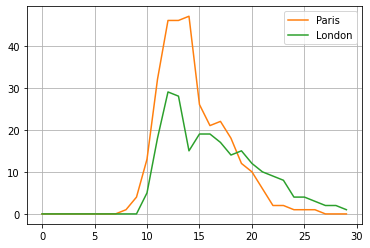

In [65]:
####
####Second Part of Closeness Centrality
####

###Printing results of closeness centrality and eccentricity based on the shortest distance matrix

import matplotlib.pyplot as plt

Centrality=[0 for i in range (Len)]


ECC=[0 for i in range (Len)]
for i in range (Len):
  for j in range (Len):
    Centrality[i]=Centrality[i]+(MinDis[i][j])/((Len-1))        
    if MinDis[i][j]>ECC[i]:
      ECC[i]=MinDis[i][j]


print("Closeness Centrality of all stops is", Centrality)
print("AvgLength of a path or avgCC is",sum(Centrality)/Len)

Best=0
CenBest=100000
for i in range (Len):
  if Centrality[i]<CenBest:
    Best=i
    CenBest=Centrality[i]
print(Best, 'has the lowest CC of', CenBest)

cnt30=[i for i in range(30)]
distrCC=[0 for i in range(30)]
for i in range (Len):
  distrCC[int(Centrality[i])]=distrCC[int(Centrality[i])]+1
londresCC=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 18, 29, 28, 15, 19, 19, 17, 14, 15, 12, 10, 9, 8, 4, 4, 3, 2, 2, 1]
print('The CC distribution in paris and London is as follow :')
plt.plot(cnt30,distrCC,'C1', label='Paris')
plt.plot(cnt30,londresCC,'C2',label='London')
plt.legend()
plt.grid(True)

In [0]:
#####################################
##### Betweeness Centrality #########
#####################################

###Shortest path matrix computation
###Dijkstra's algorithm is slightly modified to cope with a multilayer network  


import time
import queue
import numpy
from random import randint

def FillDis(StopA, StopB, NewVal, EdgeTo):
  Dis[StopA][StopB].append(NewVal)
  if (NewVal[0]!=StopA):
    FillDis(StopA,StopB,EdgeTo[NewVal[0]][NewVal[1]],EdgeTo)


def DijkstraForNode(Mat, stop):
  Help = queue.PriorityQueue()
  NodeTo2 = [[[] for i in range(NbLines)]for j in range (Len)]               
  NodeTo = [[] for i in range (Len)]               #(Previous Node, Line in the connexion)
  marked = [[False for i in range (NbLines)] for j in range (Len)]

  Help.put([0,stop,0,0])      #Only the first node doesn't need to have a specific line (priority, node, line , previous node)
  node=Help.get()

  for i in range (NbLines):
    marked[node[1]][i]=True
    for j in range(Len):
      if Adj[i][node[1]][j]==1:     
        Mat[stop][j][i]=1
        Help.put([node[0]+1,j,i,stop])
        NodeTo2[j][i]=[stop,i]
        for k in range (NbLines):
          if (j in In[k] and Mat[stop][j][k]>Penalty and j not in FailStop):
            Mat[stop][j][k]=Penalty
            Help.put([Penalty,j,k,stop])
            NodeTo2[j][k]=[stop,i]

  while (Help.empty()==False):
    node=Help.get()
    if (marked[node[1]][node[2]]==False):
      marked[node[1]][node[2]]=True
      
      #Adjacent nodes on the same line
      for j in range(Len):
        if Adj[node[2]][node[1]][j]==1 and Mat[stop][j][node[2]]>node[0]+1:     
          Mat[stop][j][node[2]]=Mat[stop][node[1]][node[2]]+1
          Help.put([node[0]+1,j,node[2],node[1]])
          NodeTo2[j][node[2]]=[node[1],node[2]]
          for k in range (NbLines-2):
            if (j in In[k] and Mat[stop][j][k]>node[0]+Penalty and j not in FailStop):
              Mat[stop][j][k]=node[0]+Penalty
              Help.put([node[0]+Penalty,j,k,node[1]])
              NodeTo2[j][k]=[node[1],node[2]]
          for k in range (NbLines-2,NbLines):
            if (j in In[k] and Mat[stop][j][k]>node[0]+Penalty*2 and j not in FailStop):
              Mat[stop][j][k]=node[0]+Penalty*2
              Help.put([node[0]+Penalty*2,j,k,node[1]])
              NodeTo2[j][k]=[node[1],node[2]]
  for i in range(Len):
    if (stop!=i):
      a=1001
      for j in range(len(MinDisBis[stop][i])):
        if (MinDisBis[stop][i][j]<a):
          a=MinDisBis[stop][i][j]
          k=j
      FillDis(stop, i,NodeTo2[i][k], NodeTo2)
  return Mat


if Mode=='Basic':
  Penalty=1
else :
  Penalty=3

#MinDisBis[i][j][k] represents the minimal distance between i and the platform of line k in station j
MinDisBis=[[[1000 for i in range (NbLines)] for j in range (Len)]for k in range (Len)]

#Dis[i][j] represents the nodes on the path between stations i and j
Dis=[0 for i in range(Len)]           
for i in range(Len):
  for j in range (NbLines):
    MinDisBis[i][i][j]=0
  Dis[i]=[[] for i in range(Len)]


for i in range(Len):
  DijkstraForNode(MinDisBis,i)

In [67]:
### Second part for Betweeness Centrality 

#Computing and printing BC results based on the shortest path matrix 


BetwCentrality=[0 for i in range (Len)]
BetwCentralityLine=[0 for i in range (NbLines)]
NbPassLine=[0 for i in range(NbLines)]
NbConnections=[[0,i] for i in range (Len)]
weightEdges=[[0 for i in range(Len)]for j in range (Len)]
for i in range(Len):
  for j in range(Len):
    Adder=Freq[i]*Freq[j]/(SumFreq-Freq[i])
    NbPassLineBis=[False for i in range(NbLines)]
    for k in range(len(Dis[i][j])):
      Current = Dis[i][j][k][0]
      Current2 = Dis[i][j][k][1]
      BetwCentrality[Current]=BetwCentrality[Current]+Adder
      BetwCentralityLine[Current2]=BetwCentralityLine[Current2]+Adder 
      NbPassLineBis[Current2]=True

    for k in range (NbLines):
      if NbPassLineBis[k]==True:
        NbPassLine[k]=NbPassLine[k]+Adder
    for k in range(len(Dis[i][j])-1):
      if (Dis[i][j][k][1]!=Dis[i][j][k+1][1]):
        NbConnections[Dis[i][j][k][0]][0]=NbConnections[Dis[i][j][k][0]][0]+1*Freq[i]*Freq[j]/(SumFreq-Freq[i])
      weightEdges[Dis[i][j][k][0]][Dis[i][j][k+1][0]]=weightEdges[Dis[i][j][k][0]][Dis[i][j][k+1][0]]+Freq[i]*Freq[j]/(SumFreq-Freq[i])
      weightEdges[Dis[i][j][k+1][0]][Dis[i][j][k][0]]=weightEdges[Dis[i][j][k][0]][Dis[i][j][k+1][0]]
    if len(Dis[i][j])>0:
      weightEdges[j][Dis[i][j][0][0]]=weightEdges[j][Dis[i][j][0][0]]+Freq[i]*Freq[j]/(SumFreq-Freq[i])
      weightEdges[Dis[i][j][0][0]][j]=weightEdges[j][Dis[i][j][0][0]]
NbConnections.sort(reverse=True)
print("Number of transfers per stop is : ", NbConnections)
for i in range (NbLines):
  BetwCentralityLine[i]=int(BetwCentralityLine[i])
  NbPassLine[i]=int(NbPassLine[i])
print("Betweeness Centrality Line is : ", BetwCentralityLine)
print("Total number of passengers that use each line : ",NbPassLine)
print("Betweeness Centrality of each station: " ,BetwCentrality)
HELP=[[BetwCentrality[i],i] for i in range(Len)]
HELP.sort(reverse=True)
print("Betweeness Centrality of each station sorted : ",HELP)
Best=0
CenBest2=0
for i in range (Len):
  if BetwCentrality[i]>CenBest2:
    Best=i
    CenBest2=BetwCentrality[i]
avgBC=0
for i in range(Len):
  avgBC=avgBC+BetwCentrality[i]
avgBC=avgBC/Len
print("Average BC is : ",avgBC)
print("maximum BC is",CenBest2,'at station', Best)

print("Total number of transfers is : " , sum([NbConnections[i][0]for i in range(Len)]))

BCEdgesSorted=[]
for i in range(Len-1):
  for j in range (i+1,Len):
    if (weightEdges[i][j] > 0):
      BCEdgesSorted.append([weightEdges[i][j],i,j])
BCEdgesSorted.sort(reverse=True)
print('Edges with highest BC (BC,station1,station2): ',BCEdgesSorted)

TotalPass=[]
for i in range (Len):
  TotalPass.append([NbConnections[i][0]+2*Freq[NbConnections[i][1]],NbConnections[i][1]])

Number of transfers per stop is :  [[378.13833662242985, 14], [134.09326781297847, 56], [128.72416124663766, 18], [119.75172342641483, 20], [102.90739716251113, 6], [100.99729792452179, 90], [87.34143567848423, 65], [86.39486611695371, 120], [86.27872575088922, 58], [71.13873543126547, 178], [55.97492321835104, 131], [55.70393555178585, 113], [53.7525412794008, 38], [50.656721753776495, 78], [50.591015574245084, 32], [48.72502665982965, 36], [47.55644166582677, 79], [47.473735421037134, 93], [43.98778776279912, 17], [38.31633498901216, 9], [33.53449107803763, 19], [30.01090021556197, 81], [27.891000287319557, 10], [27.84041330244979, 133], [26.812030080779984, 8], [25.00666444340972, 39], [24.51943204717534, 30], [22.929011865539263, 177], [22.926716037079235, 34], [21.324161192669123, 116], [21.043734956305844, 214], [20.518746679228954, 203], [20.003284152172636, 86], [18.50934057051343, 76], [17.694735771293487, 148], [16.85025321204016, 41], [16.5721220374832, 44], [15.731563207731

In [0]:
###Salience filter:
###Part 1
SalienceNumbers=[[0 for i in range (Len)] for j in range (Len)]
for i in range(Len):
  UsedEdges=[[False for i in range (Len)] for j in range (Len)]  
  for j in range(Len):
    Runner=j
    for k in range(len(Dis[i][j])):
      Previous=Runner
      Runner = Dis[i][j][k][0]
      UsedEdges[Previous][Runner]=True 
      UsedEdges[Runner][Previous]=True 
  for j in range(Len):
    for k in range(Len):
      if (UsedEdges[j][k]==True):         
        SalienceNumbers[j][k]=SalienceNumbers[j][k]+1     

In [69]:
###Part 2

###Can be changed
SalienceFilterThreshold=310

AuxSal=[]
EdgesLeftSalience=[]
for i in range(Len):
  for j in range (i,Len):
    if (SalienceNumbers[i][j] > SalienceFilterThreshold and SalienceNumbers[i][j]>0):
      AuxSal.append([SalienceNumbers[i][j],i,j])
      EdgesLeftSalience.append([i,j])
AuxSal.sort(reverse=True)
print("Number of edges kept from the original 372 is ",len(AuxSal))           

NbLeftLine=[0 for i in range(NbLines)]
for i in range (len(AuxSal)):
  nb1=AuxSal[i][1]
  nb2=AuxSal[i][2]
  for j in range(NbLines):
    for k in range(len(In[j])-1):
      if In[j][k]==nb1 and In[j][k+1]==nb2:
        NbLeftLine[j]=NbLeftLine[j]+1
      if In[j][k+1]==nb1 and In[j][k]==nb2:
        NbLeftLine[j]=NbLeftLine[j]+1
VertLine=[Length[i]-1 for i in range (NbLines)]
PercLeft=[int(100*NbLeftLine[i]/VertLine[i]) for i in range(NbLines)]
print("Nb edge per line   ", VertLine)

SalLine=[0 for i in range (NbLines)]
for i in range (NbLines):
  for j in range(len(In[i])-1):
    SalLine[i]=SalLine[i]+SalienceNumbers[In[i][j]][In[i][j+1]]
print("Nb edge left per lines", NbLeftLine)
print("Percentage Left :", PercLeft)
#print("Sum of numbers per Line", SalLine)

Number of edges kept from the original 372 is  106
Nb edge per line    [24, 24, 24, 3, 26, 21, 27, 33, 7, 37, 36, 19, 12, 28, 25, 8, 16, 10]
Nb edge left per lines [4, 2, 9, 0, 6, 7, 0, 14, 2, 17, 9, 2, 1, 9, 16, 3, 4, 1]
Percentage Left : [16, 8, 37, 0, 23, 33, 0, 42, 28, 45, 25, 10, 8, 32, 64, 37, 25, 10]


In [70]:
###Disparity filter:

###Can be changed
DisparityFilterThreshold=0.58


weight2=[[0 for i in range(Len)]for j in range (Len)]
weightF=[[0 for i in range(Len)]for j in range (Len)]

print(DecreasePerNode[160])
for i in range (Len):
  sumWeight=sum(weightEdges[i])
  for j in range(Len):
    weight2[i][j]=weightEdges[i][j]/sumWeight

for i in range(Len):
  for j in range (Len):
    if weight2[i][j]!=0:
      weightF[i][j]=1-(1-weight2[i][j])**(DC[i]-1)


AuxDis=[]
EdgesLeftDisp=[]
for i in range(Len-1):
  for j in range (i+1,Len):
    weightF[i][j]=(weightF[i][j]+weightF[j][i])/2
    weightF[j][i]=weightF[i][j]
    if (weightF[i][j] > DisparityFilterThreshold and weightF[i][j]>0):
      AuxDis.append([weightF[i][j],i,j])
      EdgesLeftDisp.append([i,j])
AuxDis.sort(reverse=True)
print("Number of edges kept from the original 372 is ",len(AuxDis))           #346 normal, 207 core

NbLeftLineDis=[0 for i in range(NbLines)]
for i in range (len(AuxDis)):
  nb1=AuxDis[i][1]
  nb2=AuxDis[i][2]
  for j in range(NbLines):
    for k in range(len(In[j])-1):
      if In[j][k]==nb1 and In[j][k+1]==nb2:
        NbLeftLineDis[j]=NbLeftLineDis[j]+1
      if In[j][k+1]==nb1 and In[j][k]==nb2:
        NbLeftLineDis[j]=NbLeftLineDis[j]+1
PercLeft=[int(100*NbLeftLineDis[i]/VertLine[i]) for i in range(NbLines)]
print("Nb edge per line   ", VertLine)
#print("Min Nb edge left      ", [10, 2, 9, 0, 6, 7, 0, 14, 2, 17, 9, 2, 1, 9, 16, 3])
print("Nb edge left per lines", NbLeftLineDis)
print("Percentage Left :", PercLeft)

0
Number of edges kept from the original 372 is  81
Nb edge per line    [24, 24, 24, 3, 26, 21, 27, 33, 7, 37, 36, 19, 12, 28, 25, 8, 16, 10]
Nb edge left per lines [9, 5, 1, 0, 11, 10, 1, 7, 0, 7, 3, 3, 8, 3, 6, 6, 7, 2]
Percentage Left : [37, 20, 4, 0, 42, 47, 3, 21, 0, 18, 8, 15, 66, 10, 24, 75, 43, 20]


In [71]:
###Weight Treshold


###Can be changed
WeightFilterThreshold=60

AuxDisW=[]
EdgesLeftWeightTresh=[]
for i in range(Len-1):
  for j in range (i+1,Len):
    if (weightEdges[i][j] > WeightFilterThreshold and weightEdges[i][j]>0):
      AuxDisW.append([weightEdges[i][j],i,j])
      EdgesLeftWeightTresh.append([i,j])
AuxDisW.sort(reverse=True)
print("AuxDisW ",AuxDisW)
print("Number of edges kept from the original 372 is ",len(AuxDisW))           

NbLeftLineDis=[0 for i in range(NbLines)]
for i in range (len(AuxDisW)):
  nb1=AuxDisW[i][1]
  nb2=AuxDisW[i][2]
  for j in range(NbLines):
    for k in range(len(In[j])-1):
      if In[j][k]==nb1 and In[j][k+1]==nb2:
        NbLeftLineDis[j]=NbLeftLineDis[j]+1
      if In[j][k+1]==nb1 and In[j][k]==nb2:
        NbLeftLineDis[j]=NbLeftLineDis[j]+1
PercLeft=[int(100*NbLeftLineDis[i]/VertLine[i]) for i in range(NbLines)]
print("Nb edge per line   ", VertLine)
print("Nb edge left per lines", NbLeftLineDis)
print(PercLeft)

AuxDisW  [[276.76665397239344, 14, 18], [219.3564673205926, 14, 149], [205.49920438265025, 149, 178], [170.7209462995041, 56, 178], [163.64619415541085, 18, 20], [157.32020369589523, 20, 302], [152.0782569639274, 78, 79], [146.84066913155974, 298, 299], [146.84066913155974, 58, 299], [146.84066913155974, 6, 298], [139.45711431778992, 14, 84], [139.16035830459688, 10, 178], [136.57166392809006, 84, 85], [130.26593737368435, 18, 301], [130.26593737368435, 14, 301], [127.38954637564802, 85, 86], [126.6708897945332, 296, 297], [126.6708897945332, 295, 296], [126.6708897945332, 294, 295], [126.6708897945332, 293, 294], [126.6708897945332, 6, 297], [126.6708897945332, 0, 293], [125.38345624783044, 58, 300], [125.38345624783044, 14, 300], [124.55621436689947, 32, 278], [123.40923724428728, 8, 9], [119.52838157295795, 18, 131], [118.92834956267032, 277, 278], [118.71795182775959, 56, 279], [117.07039194594222, 5, 6], [116.59823974114022, 32, 279], [115.54398404272845, 303, 304], [115.543984042

Visualization is for BC Mode


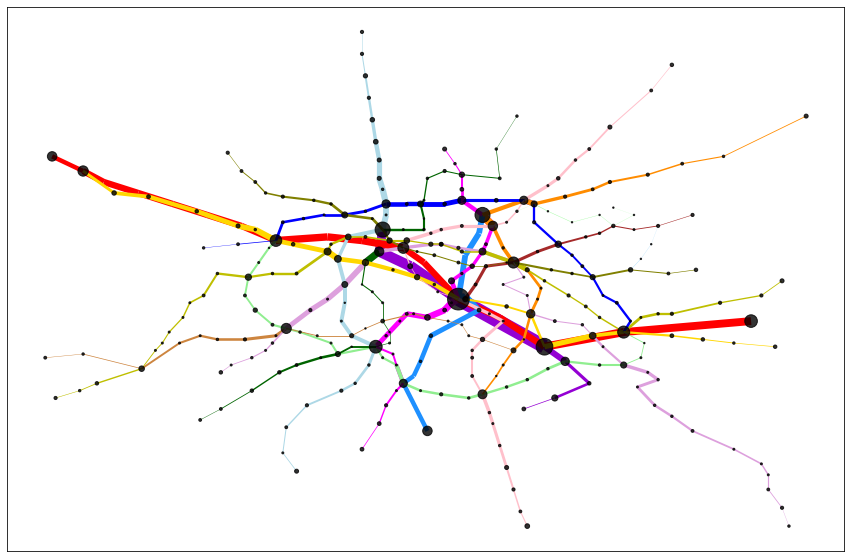

In [72]:
#####
##### Visualizations for betweeness centrality or backbone with combination of filters
#####

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for i in range(NbLines):
  G.add_nodes_from(In[i])
  for j in range(len(In[i])-1):
    G.add_edge(In[i][j],In[i][j+1])


pos =	{i: (Coord[2*i+1],Coord[2*i]) for i in range (Len)}

plt.figure(figsize=(15,10))

NodeSize=[5 for i in range(Len)]
NodeColor=['black' for i in range(Len)]


###Visualization for backbone with sparcification filters
print('Visualization is for',Mode,'Mode')
if Mode=='Backbone':
  ColorLine=['black' for i in range (NbLines)]
  nx.draw_networkx_nodes(G, pos,node_color=NodeColor,node_size=NodeSize,alpha=0.8)
  for i in range(NbLines):
    for j in range(len(In[i])-1):
      if [In[i][j],In[i][j+1]] in EdgesLeftDisp or [In[i][j+1],In[i][j]] in EdgesLeftDisp:
        nx.draw_networkx_edges(G, pos,edgelist=[(In[i][j],In[i][j+1])],width=3, alpha=1,edge_color=ColorLine[i])
      elif [In[i][j],In[i][j+1]] in EdgesLeftSalience or [In[i][j+1],In[i][j]] in EdgesLeftSalience:
        nx.draw_networkx_edges(G, pos,edgelist=[(In[i][j],In[i][j+1])],width=3, alpha=1,edge_color=ColorLine[i])
      elif [In[i][j],In[i][j+1]] in EdgesLeftWeightTresh or [In[i][j+1],In[i][j]] in EdgesLeftWeightTresh:
        nx.draw_networkx_edges(G, pos,edgelist=[(In[i][j],In[i][j+1])],width=3, alpha=1,edge_color=ColorLine[i])
      else:
        nx.draw_networkx_edges(G, pos,edgelist=[(In[i][j],In[i][j+1])],width=3, alpha=0.05,edge_color=ColorLine[i])



###Visualization for Betweenness Centrality

if Mode=='BC' or Mode=='L14RERAFailure' or Mode=='DeconfinementPlan' or Mode=='Basic':
  ColorLine=['gold','b','olive','lightskyblue','magenta','darkorange','lightgreen','pink','palegreen','plum','y','peru','brown','darkgreen','lightblue','darkviolet','red','dodgerblue']
  if Mode=='L14RERAFailure':
    ColorLine=['gold','b','olive','lightskyblue','magenta','darkorange','lightgreen','pink','palegreen','plum','y','peru','brown','darkgreen','lightblue','dodgerblue']
  
  for i in range (Len):
    j=TotalPass[i][1]
    NodeSize[j]=TotalPass[i][0]
  nx.draw_networkx_nodes(G, pos,node_color=NodeColor,node_size=NodeSize,alpha=0.8)

  for i in range (len(BCEdgesSorted)):
    BC=BCEdgesSorted[i][0]/20
    n1=BCEdgesSorted[i][1]
    n2=BCEdgesSorted[i][2]
    for j in range(NbLines):
      for k in range(len(In[j])-1):
        if In[j][k]==n1 and In[j][k+1]==n2:
          nx.draw_networkx_edges(G, pos,edgelist=[(n1,n2)],width=BC, alpha=1, edge_color=ColorLine[j])        
        if In[j][k]==n2 and In[j][k+1]==n1:
          nx.draw_networkx_edges(G, pos,edgelist=[(n2,n1)],width=BC, alpha=1, edge_color=ColorLine[j])
plt.show()